# Import

In [75]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# 농업인 성별격차

Ref: [농림축산식품부 농업경영체 등록정보 현황서비스](https://edu.agrix.go.kr/uni_docs7/biOlap/dashBoard.do)

## 농업경영체 현황(농업인)_지역별 농업인 현황

In [2]:
dfs = []

years = range(2015, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체 현황(농업인)_지역별 농업인 현황.csv'
    df = pd.read_csv(file_path, header=1).iloc[:-1, :4]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수'})
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

In [3]:
fig = px.line(df_all, x='연도', y='여성비율', color='시도명',
              title='연도별 여성 비율',
              labels={'연도': '연도', '여성비율': '여성 비율'},
              markers=True)
fig

In [4]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True)
fig.update_layout(showlegend=False)
fig

## 농업경영체현황(농업인)_지역별현황(경영주)

In [76]:
dfs = []

years = range(2015, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체현황(농업인)_지역별현황(경영주).xlsx'
    df = pd.read_excel(file_path, header=1).iloc[:-1, :4]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수'})
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

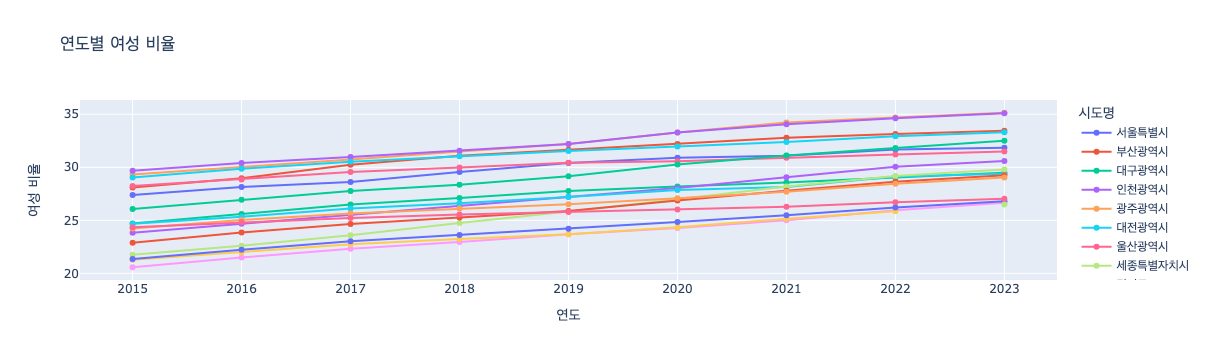

In [78]:
fig = px.line(df_all, x='연도', y='여성비율', color='시도명',
              title='연도별 여성 비율',
              labels={'연도': '연도', '여성비율': '여성 비율'},
              markers=True)
fig

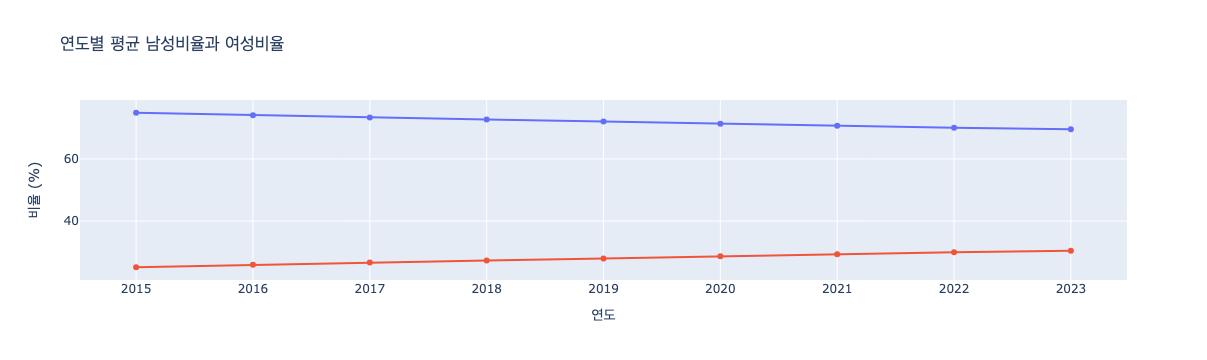

In [79]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True)
fig.update_layout(showlegend=False)
fig

## 농업경영체현황(농업인)_지역별공동경영주현황

In [ ]:
pd.read_excel('./dataset/Farm_dataset/2023_농업경영체현황(농업인)_지역별공동경영주현황.xlsx').iloc[,]

,시도,공동경영주 수(명),공동경영주 남성(명),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,공동경영주 여성(명),Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,계,20세 미만,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상,계,20세 미만,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세 이상
1,서울특별시,580.0,134,0,1,0,4,14,70,40,5,446,0,0,6,26,105,203,90,16
2,부산광역시,1813.0,371,0,0,2,5,35,166,133,30,1442,0,0,10,60,269,671,382,50
3,대구광역시,3781.0,699,0,1,0,19,112,312,219,36,3082,0,0,27,135,659,1333,741,187
4,인천광역시,782.0,161,0,0,2,1,18,81,55,4,621,0,0,6,41,133,292,126,23
5,광주광역시,3143.0,572,0,0,0,15,62,253,189,53,2571,0,1,30,121,503,1090,692,134
6,대전광역시,434.0,106,0,1,0,4,13,57,25,6,328,0,0,0,15,91,156,57,9
7,울산광역시,5810.0,801,0,0,2,10,52,393,290,54,5009,0,1,25,203,1126,2250,1183,221
8,세종특별자치시,470.0,78,0,0,0,1,10,49,18,0,392,0,1,11,28,98,178,59,17
9,경기도,11039.0,1766,0,1,8,50,263,886,460,98,9273,0,12,137,532,2070,4277,1874,371


In [81]:
dfs = []

years = range(2018, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체현황(농업인)_지역별공동경영주현황.xlsx'
    df = pd.read_excel(file_path, header=1).iloc[:-1, :4]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수'})
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

KeyError: '남'

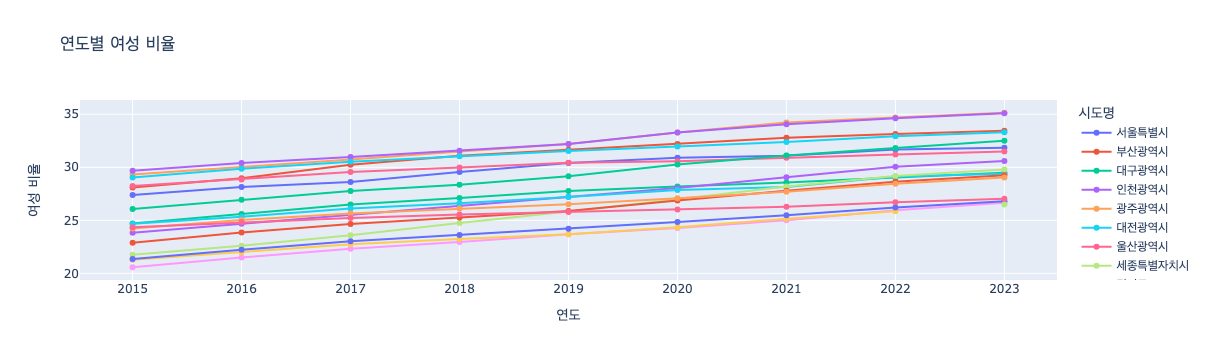

In [78]:
fig = px.line(df_all, x='연도', y='여성비율', color='시도명',
              title='연도별 여성 비율',
              labels={'연도': '연도', '여성비율': '여성 비율'},
              markers=True)
fig

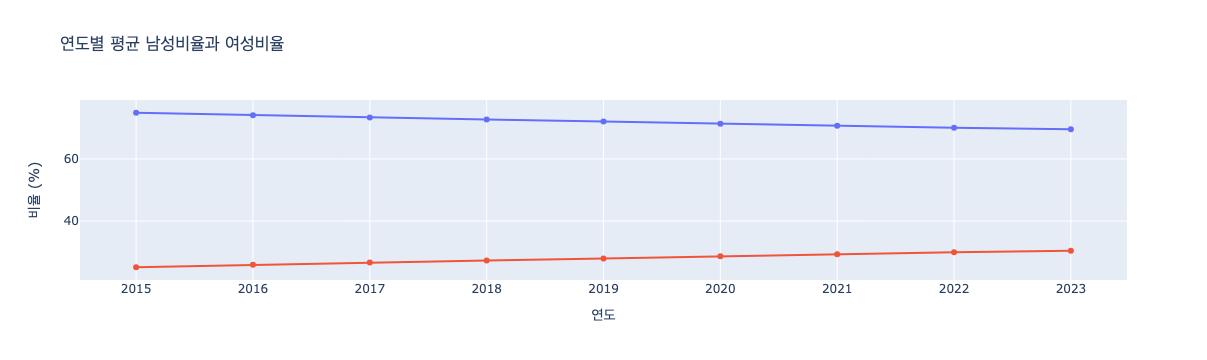

In [79]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True)
fig.update_layout(showlegend=False)
fig

# 여성농업인 소득

# 여성농업인 지위

Ref: [국가농식물통계서비스](https://kass.mafra.go.kr/newkass/kas/sti/sti/themeConfmStats.do?trg=001)

- 연령별

In [50]:
df = pd.read_csv('dataset/Farm_dataset/2022_거주_지역사회에서_여성의_지위_인식.csv',header=1).iloc[7:11,1:]

In [10]:
age_groups = df['구분(2)']
values = df.set_index('구분(2)').drop(columns='사례수 (명)')

In [11]:
fig = go.Figure()

for column in values.columns:
    fig.add_trace(go.Bar(
        x=age_groups,
        y=values[column],
        name=column
    ))
fig.update_layout(
    title='설문 조사 결과 - 연령대별 비율',
    xaxis_title='연령대',
    yaxis_title='비율 (%)',
    barmode='stack'
)

fig

In [59]:
df = pd.read_csv('dataset/Farm_dataset/2022_거주_지역사회에서_여성의_지위_인식.csv',header=1).iloc[4:7,1:]

In [60]:
age_groups = df['구분(2)']
values = df.set_index('구분(2)').drop(columns='사례수 (명)')

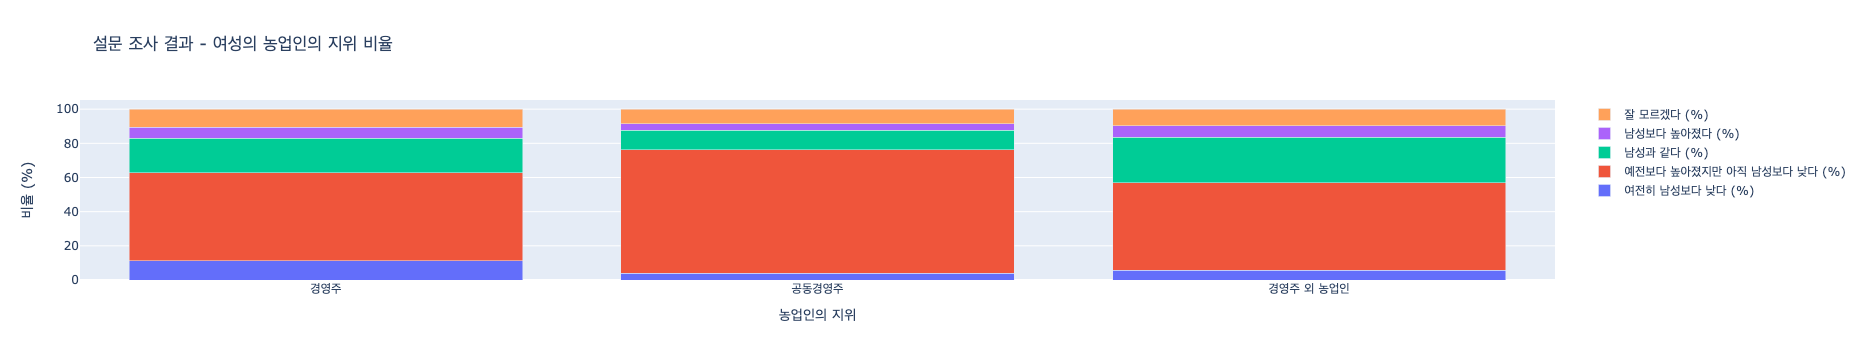

In [63]:
fig = go.Figure()

for column in values.columns:
    fig.add_trace(go.Bar(
        x=age_groups,
        y=values[column],
        name=column
    ))
fig.update_layout(
    title='설문 조사 결과 - 여성의 농업인의 지위 비율',
    xaxis_title='농업인의 지위',
    yaxis_title='비율 (%)',
    barmode='stack'
)

fig

# 여성농업인 역량